<a href="https://colab.research.google.com/github/xrounak/DSA/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA


##Data Processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os
import random

# Define the expected path of the uploaded file
star = '/content/drive/MyDrive/star_dataset.csv'

df = pd.read_csv(star)

Y = np.array(df['Temperature'])

X = np.array(df[['Distance','Luminosity','Radius']])

data = list(zip(X, Y))
random.shuffle(data)

train_data = data[:int(0.8*len(data))]
test_data = data[int(0.8*len(data)):]

X_train, Y_train = zip(*train_data)
X_test, Y_test = zip(*test_data)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape)
print(Y_train.shape)

mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)

X_train = (X_train - mu) / sigma
X_test  = (X_test  - mu) / sigma

X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test  = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

print("New X_train shape:", X_train.shape)
print("New X_test shape:", X_test.shape)

(800, 3)
(800,)
New X_train shape: (800, 4)
New X_test shape: (200, 4)


###Data distribution plotting

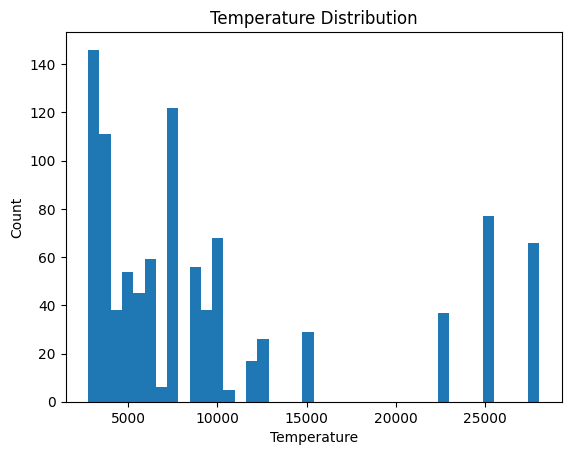

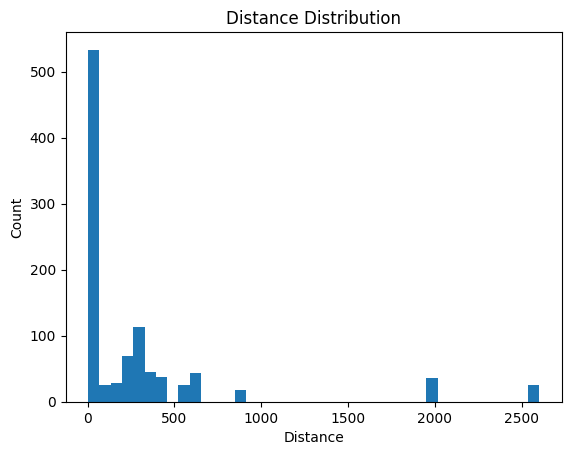

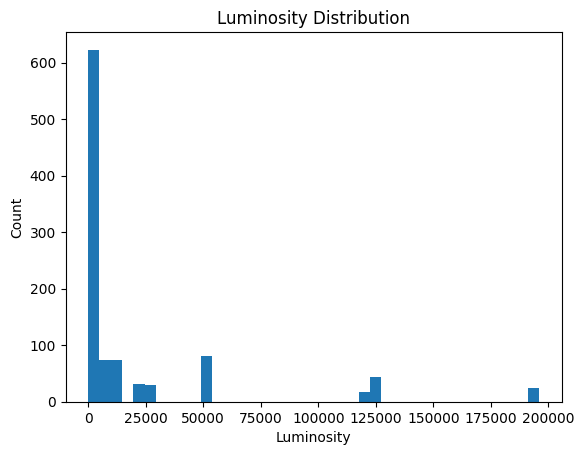

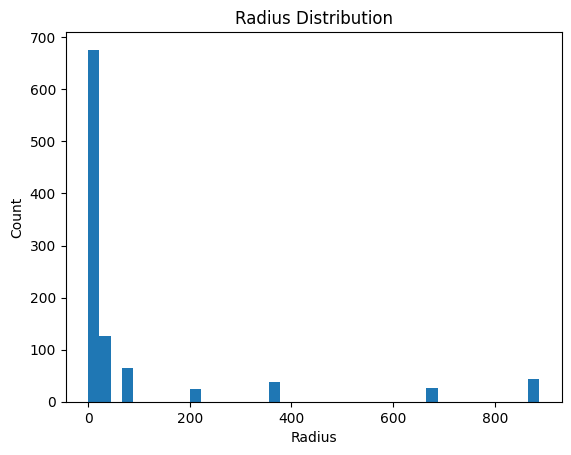

In [ ]:
plt.hist(df["Temperature"], bins=40)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Temperature Distribution")
plt.show()

plt.hist(df["Distance"], bins=40)
plt.xlabel("Distance")
plt.ylabel("Count")
plt.title("Distance Distribution")
plt.show()

plt.hist(df["Luminosity"], bins=40)
plt.xlabel("Luminosity")
plt.ylabel("Count")
plt.title("Luminosity Distribution")
plt.show()

plt.hist(df["Radius"], bins=40)
plt.xlabel("Radius")
plt.ylabel("Count")
plt.title("Radius Distribution")
plt.show()


###Feature VS Output (Scatter plot)


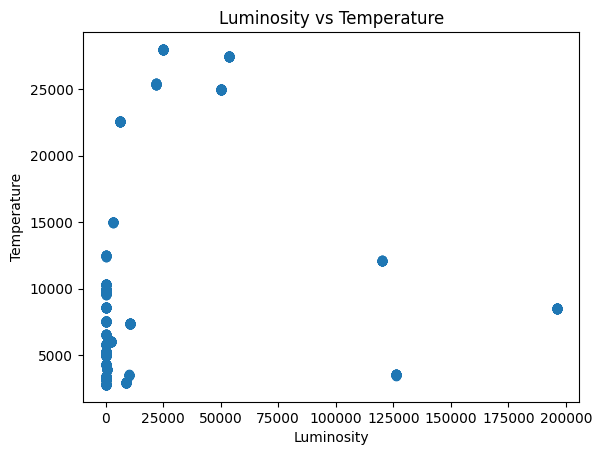

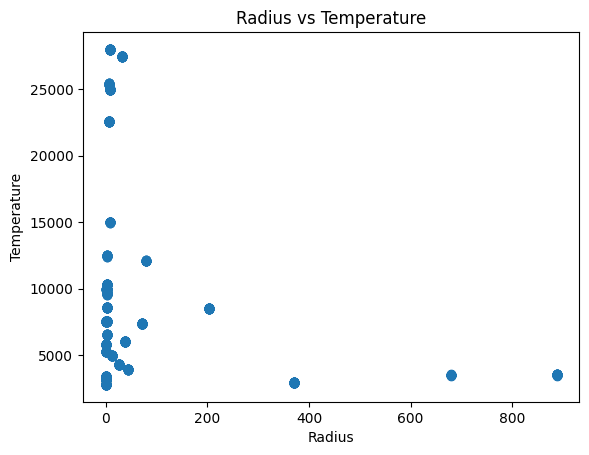

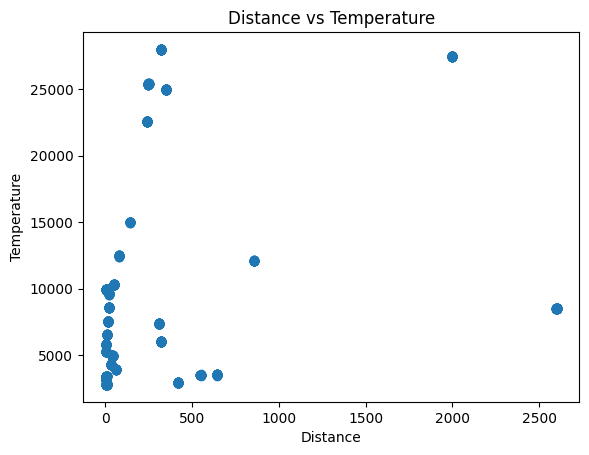

In [ ]:
plt.scatter(df["Luminosity"], df["Temperature"])
plt.xlabel("Luminosity")
plt.ylabel("Temperature")
plt.title("Luminosity vs Temperature")
plt.show()

plt.scatter(df["Radius"], df["Temperature"])
plt.xlabel("Radius")
plt.ylabel("Temperature")
plt.title("Radius vs Temperature")
plt.show()

plt.scatter(df["Distance"], df["Temperature"])
plt.xlabel("Distance")
plt.ylabel("Temperature")
plt.title("Distance vs Temperature")
plt.show()


###HEATMAP

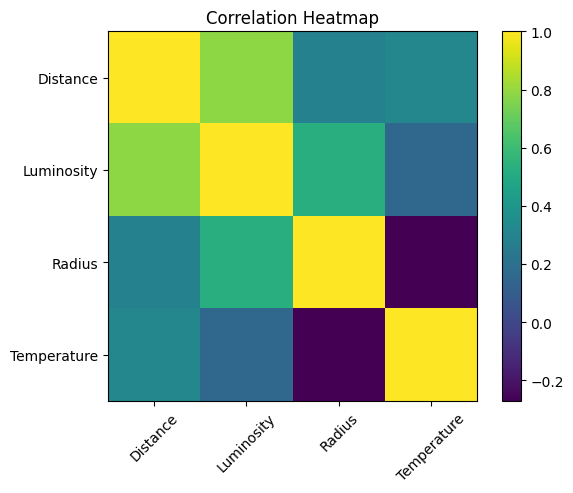

In [ ]:
corr = df[["Distance","Luminosity","Radius","Temperature"]].corr()

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


##Traning DATA

In [ ]:
alpha = 0.01
iters = 2000
m_train = X_train.shape[0]

theta = np.zeros(X_train.shape[1])
cost_history = []

for _ in range(iters):
    y_pred = X_train.dot(theta)
    error = y_pred - Y_train

    grad = (1/m_train) * (X_train.T.dot(error))
    theta = theta - alpha * grad

    # theta = np.linalg.inv(X_train_b.T @ X_train_b) @ (X_train_b.T @ Y_train)


    cost = (1/(2*m_train)) * np.sum(error**2)
    cost_history.append(cost)
    print(cost)


80545024.59582603
79437060.34662037
78350966.75147621
77286301.70382327
76242632.38962112
75219535.07887752
74216594.92233576
73233405.75318526
72269569.8936544
71324697.96634921
70398408.71020538
69490328.80092598
68600092.67578077
67727342.3626471
66871727.31317619
66032904.23997221
65210536.95767486
64404296.22784014
63613859.60751651
62838911.30141722
62079142.017592795
61334248.82651015
60603935.02344805
59887909.99412106
59185889.08344708
58497593.46737595
57822750.02769899
57161091.22976206
56512355.00300658
55876284.624265574
55252628.60374389
54641140.573613495
54041579.17915726
53453707.972396225
52877295.30813736
52312114.242380776
51757942.43302668
51214562.04282473
50681759.64450946
50159326.12806738
49647056.610082954
49144750.34511178
48652210.63903124
48169244.76431986
47695663.877218306
47231282.936725885
46775920.62538813
46329399.27183191
45891544.775005855
45462186.53008515
45041157.35600046
44628293.42455246
44223434.19107392
43826422.32660251
43437103.651528835
43

###Minimise_cost_fn.plot()

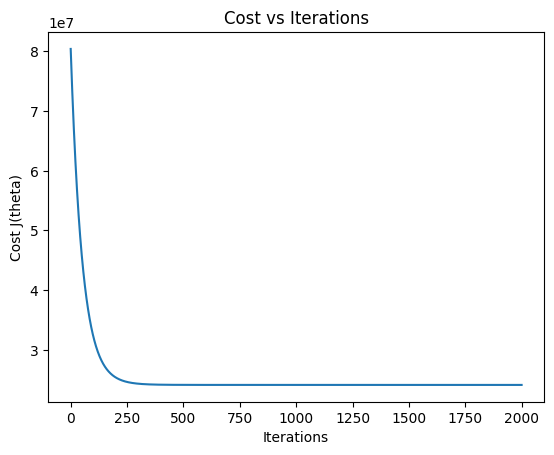

In [ ]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost J(theta)")
plt.title("Cost vs Iterations")
plt.show()


In [ ]:
y_test_pred = X_test.dot(theta)

mse = np.mean((y_test_pred - Y_test)**2)
print("Test MSE:", mse)
rmse = np.sqrt(mse)
print("Test RMSE:", rmse)


Test MSE: 47340864.710461594
Test RMSE: 6880.469803033918


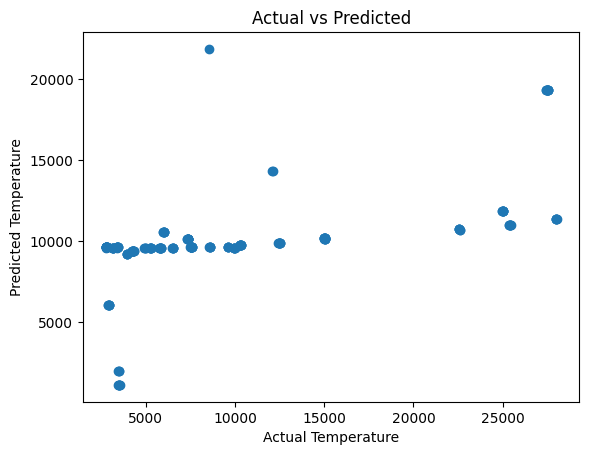

In [ ]:
plt.scatter(Y_test, y_test_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted")
plt.show()


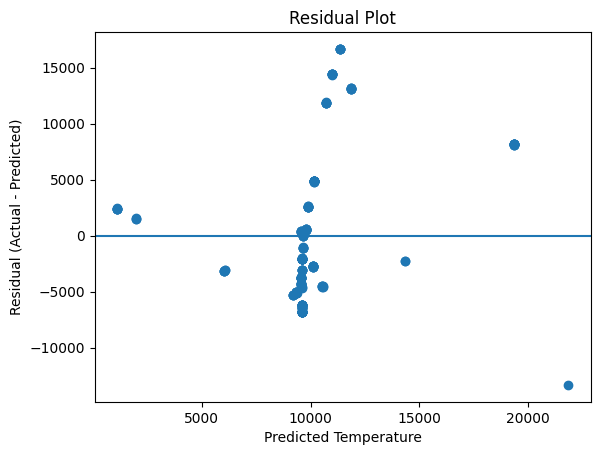

In [ ]:
residuals = Y_test - y_test_pred

plt.scatter(y_test_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Temperature")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x="Distance",
    y="Luminosity",
    z="Radius",
    size="Temperature",        # size = temp
    color="Temperature",       # also color = temp (recommended)
    opacity=0.7
)

fig.show()


In [ ]:
import plotly.express as px

df_vis = df.copy()
X_full = np.array(df[['Distance','Luminosity','Radius']])
m = X_full.shape[0]

X_full = np.c_[np.ones(m), X_full]   # add bias

df_vis["PredTemp"] = X_full @ theta


fig = px.scatter_3d(
    df_vis,
    x="Distance",
    y="Luminosity",
    z="Radius",
    color="PredTemp",
    size="PredTemp",
    opacity=0.7
)
fig.show()


# **Problem Set 1**

## **Pre-processing DATA**

### **Importing data**

In [ ]:
import pandas as pd
import numpy as np

X = pd.read_csv('/content/sample_data/x.dat', sep=r'\s+', header=None)
Y = pd.read_csv('/content/sample_data/y.dat', sep=r'\s+', header=None)

X_data = np.array(X)
Y_data = np.array(Y)

### **Splitting DATA**

In [ ]:
X_train = X_data[:50]
Y_train = Y_data[:50]

X_test = X_data[50:]
Y_test = Y_data[50:]

X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test  = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


print(X_test.shape)


(19, 3)


### **Calculating thetA**

In [ ]:
theta = np.zeros(X_train.shape[1])
lr = 0.0001

def lwlr(x_query, X_train, Y_train, tau):
    m = X_train.shape[0]

    z= np.zeros((m,1))
    D = np.zeros((m,m))

    h_theta = np.dot(X_train, theta)

    I = np.eye(m)

    for i in range(m):
        x_train = X_train[i]
        y_train = Y_train[i]
        diff = x_query - X_train
        weights = np.exp(-np.sum(diff**2, axis=1) / (2 * tau**2))
        z[i] = weights*(Y_train[i]-h_theta*X_train[i])

        D[i][i] = -weights*h_theta*(1-h_theta*X_train[i])

    l1 = (X_train.T @ z)-(lr*theta)
    l2 = (X_train.T @ D @ X_train) - (lr*I)
    l2_inv = np.linalg.inv(l2)

    theta = theta -( l1 @ l2_inv )






In [ ]:
for i in range(19):
  lwlr(X_test[i], X_train, Y_train, 0.2)

UnboundLocalError: cannot access local variable 'theta' where it is not associated with a value